# Lending Club Case Study

## Installing Libraries

In [273]:
#importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Understanding

In [274]:
#loading the csv file
loan_data = pd.read_csv(r"C:\Users\ssingh6\OneDrive - Microsoft\Desktop\Masters\Learn\Course 2 - Statistics Essentials\Study Group - Lending Club Case Study\loan\loan.csv", low_memory=False)

In [275]:
## Shape of the dataframe
loan_data.shape

(39717, 111)

In [276]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.043479
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,2.000000


## Data Cleaning

### Handling the missing and null values

In [277]:
#checking the null values in the columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [278]:
#deleting the columns where all 39717 values are null
loan_data.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'], axis=1, inplace=True)

In [279]:
#Deleting the column funded_amnt as the final funded loan by the investor is funded_amnt_inv which will be used for the analysis.
loan_data.drop(['funded_amnt'], axis=1, inplace=True)

In [280]:
#zip_code is not very useful instead we will can use addr_state hence deleting zip_code column
loan_data.drop(['zip_code'], axis=1, inplace=True)

In [281]:
#out_prncp, out_prncp_inv, last_credit_pull_d, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, 
#collection_recovery_fee, and last_pymnt_d are not helping in taking the decision as these are related to the borrower who has 
#already received the loan. Hence deleting these columns.
loan_data.drop(['out_prncp', 'out_prncp_inv', 'last_credit_pull_d', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)

In [282]:
#Getting the percentage of the null values in the available columns
null_percentage = loan_data.isnull().sum()/len(loan_data.index)*100
null_percentage.sort_values(ascending=False).head(15)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
policy_code                    0.000000
inq_last_6mths                 0.000000
total_pymnt_inv                0.000000
dtype: float64

In [283]:
#So we have columns where more than 50% data contains null values. Hence deleting such columns.
loan_data.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)

In [284]:
#Just to make sure there are no extra space before and after the column so using the strip function.
loan_data.columns = loan_data.columns.str.strip()

In [285]:
#Finding the column which has unique values in the all the rows
loan_data.nunique().sort_values(ascending=False).head()

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
dtype: int64

In [286]:
#we are not going to perform any join or relation with the unique values hence deleting id, url, member_id columns
loan_data.drop(['id', 'member_id', 'url'], axis=1, inplace=True)

In [287]:
#There are certain columns with one unique value which won't provide any information so deleting such columns
loan_data.drop(['initial_list_status','pymnt_plan','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1, inplace=True)

In [288]:
#checking the remaining null values in the columns
loan_data.isnull().sum().sort_values(ascending=False).head(10)

desc                    12940
emp_title                2459
emp_length               1075
pub_rec_bankruptcies      697
revol_util                 50
title                      11
total_pymnt                 0
total_acc                   0
total_pymnt_inv             0
dti                         0
dtype: int64

In [289]:
#As per the Data_Dictionary sheet, desc, emp_title, and title columns are description provided by the borrower which won't be used hence deleting.
loan_data.drop(['desc', 'emp_title', 'title'], axis=1, inplace=True)

In [290]:
#'emp_length' is an important column which shows the employment years and having null values in it will provide wrong 
#information so deleting such rows.
loan_data.dropna(subset = ["emp_length"], inplace=True)

In [291]:
#pub_rec_bankruptcies is an important column and having null values will lead to the incorrect analysis hence deleting such rows
loan_data.dropna(subset = ["pub_rec_bankruptcies"], inplace=True)

In [292]:
#revol_util is an important column and having null values will lead to the incorrect analysis hence deleting such rows
loan_data.dropna(subset = ["revol_util"], inplace=True)

In [293]:
#checking if any null values remaining in the dataset
loan_data.isnull().sum().sort_values(ascending=False).head()

loan_amnt          0
funded_amnt_inv    0
last_pymnt_amnt    0
total_pymnt_inv    0
total_pymnt        0
dtype: int64

In [294]:
#loan_status has 3 values which is Fully Paid, Charged Off, and Current. For the analysis, we will be focusing on Fully Paid 
#and Charged Off, hence deleting rows having loan_status as 'Current'.
loan_data = loan_data[~(loan_data.loan_status == 'Current')]

In [295]:
#checking the remaining rows and columns in the dataset
loan_data.shape

(36800, 28)

### Validating the datatypes and fixing wherever required

In [296]:
#checking the datatypes of all the columns
loan_data.dtypes

loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

In [297]:
#Removing % from int_rate, revol_util columns and converting them to float.
loan_data.int_rate = loan_data.int_rate.str.strip('%').astype(float)
loan_data.revol_util = loan_data.revol_util.str.strip('%').astype(float)

In [298]:
#Deleting months from 'term' column and converting to int64
loan_data.term = loan_data.term.str.strip('months').astype('int64')

In [299]:
#Changing emp_length to numeric years. Considering 10+ as 10 and < 1 as 0.5
loan_data['emp_length'] = loan_data['emp_length'].str.rstrip('years ')
loan_data['emp_length'].replace({'10+': '10'}, inplace=True)
loan_data['emp_length'][loan_data['emp_length'] == '< 1'] = '0.5'

C:\Users\ssingh6\AppData\Local\Temp\1\ipykernel_29964\3431942270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['emp_length'][loan_data['emp_length'] == '< 1'] = '0.5'


In [300]:
#converting emp_length to float type
loan_data['emp_length'] = loan_data['emp_length'].astype(float)

#### Change issue_d and earliest_cr_line to date format.

In [301]:
#converting issue_d to date format.
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')

In [302]:
#converting earliest_cr_line to date format. By default it is considering the future years like 2065. To fix this, subtracting
#more than 2020 years to 100 to go to the twentieth century
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [303]:
#checking the datatypes again
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36800 non-null  int64         
 1   funded_amnt_inv       36800 non-null  float64       
 2   term                  36800 non-null  int64         
 3   int_rate              36800 non-null  float64       
 4   installment           36800 non-null  float64       
 5   grade                 36800 non-null  object        
 6   sub_grade             36800 non-null  object        
 7   emp_length            36800 non-null  float64       
 8   home_ownership        36800 non-null  object        
 9   annual_inc            36800 non-null  float64       
 10  verification_status   36800 non-null  object        
 11  issue_d               36800 non-null  datetime64[ns]
 12  loan_status           36800 non-null  object        
 13  purpose         

## Derived Metrics

### Type Driven Metrics

In [304]:
#Creating a new column of Year and Month from column issue_d
loan_data['issue_d_year'] = pd.DatetimeIndex(loan_data.issue_d).year
loan_data['issue_d_month'] = pd.DatetimeIndex(loan_data.issue_d).strftime('%b')

In [305]:
#Creating a new column of Year and Month from column earliest_cr_line
loan_data['earliest_cr_line_year'] = pd.DatetimeIndex(loan_data.earliest_cr_line).year
loan_data['earliest_cr_line_month'] = pd.DatetimeIndex(loan_data.earliest_cr_line).strftime('%b')

### Data Driven Metrics

In [306]:
#Creating a new column of Net Worth from columns emp_length and annual_inc by multiplying the both
loan_data['net_worth'] = loan_data.emp_length * loan_data.annual_inc

### Business Driven Metrics
We can ask the business about the borrower's age so that we can segregate the data based on the age ratio. As here we are not going to discuss it with business, we are ignoring it.

In [307]:
#checking the data whether it is looking correct or not
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,net_worth
0,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,...,9,5863.155187,5833.84,171.62,0.0,2011,Dec,1985,Jan,240000.0
1,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,30000.0,...,4,1008.710000,1008.71,119.66,0.0,2011,Dec,1999,Apr,15000.0
2,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,...,10,3005.666844,3005.67,649.91,0.0,2011,Dec,2001,Nov,122520.0
3,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,...,37,12231.890000,12231.89,357.48,0.0,2011,Dec,1996,Feb,492000.0
5,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,...,12,5632.210000,5632.21,161.03,0.0,2011,Dec,2004,Nov,108000.0


## Sanity Check

In [308]:
#funded amount is not greater than loan amount
loan_data[loan_data.funded_amnt_inv > loan_data.loan_amnt]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,net_worth


In [309]:
#Term should be either 36 months or 60 months
loan_data[~((loan_data.term==36) | (loan_data.term==60))]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,net_worth


In [310]:
#earliest_cr_line is not greater than issue_d
loan_data[loan_data.earliest_cr_line > loan_data.issue_d]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,net_worth


In [311]:
#interest rate is always greater than 0
loan_data[loan_data.int_rate < 0]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,net_worth


## Outliers Handling

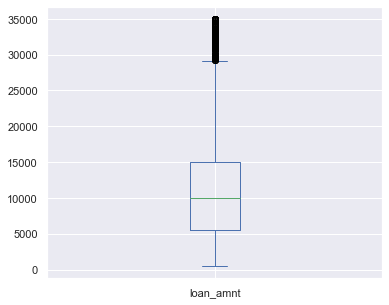

In [312]:
#loan amount distribution
loan_data.loan_amnt.plot(kind="box", figsize=(6,5))
plt.show()

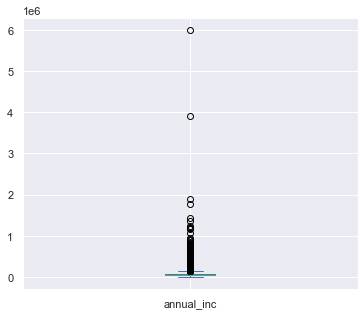

In [313]:
#annual income distribution
loan_data.annual_inc.plot(kind="box", figsize=(6,5))
plt.show()

In [314]:
#Annual income clearly shows the outliers. Let's handle the outliers here.
loan_data.annual_inc.describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [315]:
#checking the outliers above 95% using quantile
loan_data[loan_data.annual_inc>loan_data.annual_inc.quantile(.95)].annual_inc.sort_values(ascending=False)

30107    6000000.0
29639    3900000.0
23551    1900000.0
7247     1782000.0
33982    1440000.0
           ...    
3079      143000.0
11012     143000.0
25852     142500.0
31342     142500.0
24946     142500.0
Name: annual_inc, Length: 1828, dtype: float64

In [316]:
#removing the outliers above 95% using quantile
loan_data = loan_data[~(loan_data.annual_inc>loan_data.annual_inc.quantile(.95))]

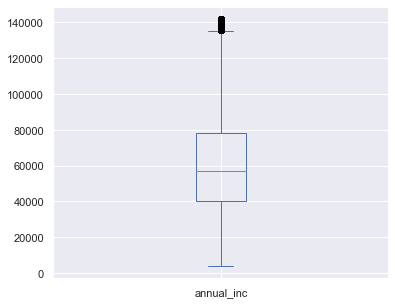

In [317]:
#checking the outliers again after removing the outliers
sns.set(rc={'figure.figsize':(6,5)})
loan_data.annual_inc.plot(kind="box")
plt.show()

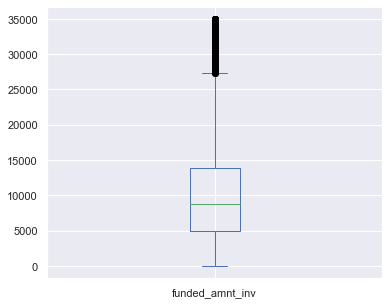

In [318]:
#checking outliers of funded_amnt
sns.set(rc={'figure.figsize':(6,5)})
loan_data.funded_amnt_inv.plot(kind="box")
plt.show()

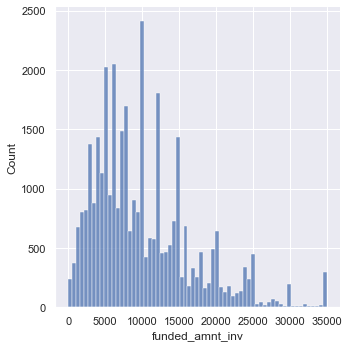

In [319]:
sns.displot(x=loan_data['funded_amnt_inv'])
plt.show()

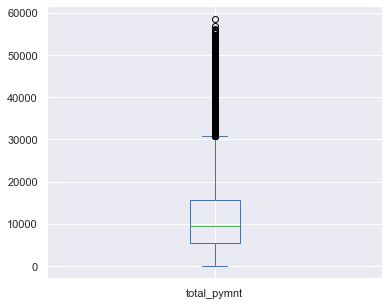

In [320]:
#checking outliers of total_pymnt
sns.set(rc={'figure.figsize':(6,5)})
loan_data.total_pymnt.plot(kind="box")
plt.show()

In [321]:
#Total Payment clearly shows the outliers. Let's handle the outliers here.
loan_data.total_pymnt.describe()

count    34972.000000
mean     11568.516382
std       8452.048622
min          0.000000
25%       5479.098451
50%       9495.714836
75%      15630.429847
max      58563.679930
Name: total_pymnt, dtype: float64

In [322]:
#checking the outliers above 95% using quantile
loan_data[loan_data.total_pymnt>loan_data.total_pymnt.quantile(.95)].total_pymnt.sort_values(ascending=False)

5180     58563.67993
7903     56849.26986
19105    56199.43995
5659     55906.94990
13927    55768.77995
            ...     
876      28789.91003
28876    28788.92873
33672    28785.60673
8208     28773.26178
33217    28772.54999
Name: total_pymnt, Length: 1749, dtype: float64

In [323]:
#removing the outliers above 95% using quantile
loan_data = loan_data[~(loan_data.total_pymnt>loan_data.total_pymnt.quantile(.95))]

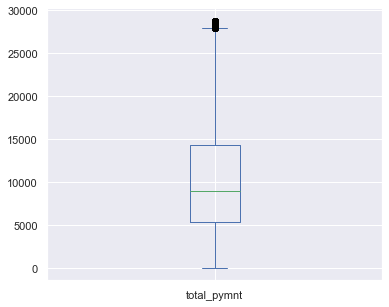

In [324]:
#checking the outliers again after removing the outliers
sns.set(rc={'figure.figsize':(6,5)})
loan_data.total_pymnt.plot(kind="box")
plt.show()

## Univariate and Segmented Univariate Analysis

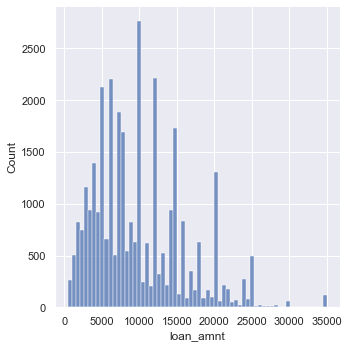

In [325]:
#checking the distribution of loan_amnt
sns.set(rc={'figure.figsize':(6,5)})
sns.displot(loan_data.loan_amnt)
plt.show()

**Inference**: More number of loans are applied near 5000 while the amount 10000 was applied the most.

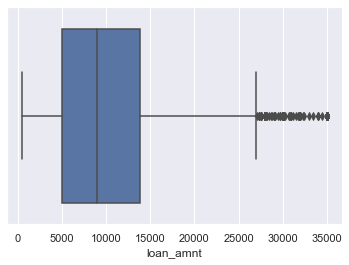

In [326]:
#checking the loan_amnt in box plot
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(x=loan_data.loan_amnt)
plt.show()

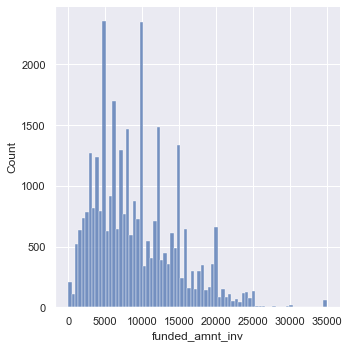

In [327]:
#checking the distribution of funded_amnt_inv
sns.set(rc={'figure.figsize':(6,5)})
sns.displot(loan_data.funded_amnt_inv)
plt.show()

**Inference**: Similar to loan amount more number of loans were sanctioned near 5000 while the amount 10000 is almost similar to 5000 which were sanctioned.

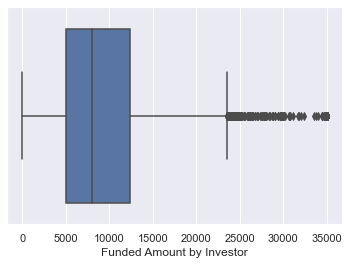

In [328]:
#checking the funded_amnt in box plot
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(x=loan_data.funded_amnt_inv)
plt.xlabel('Funded Amount by Investor')
plt.show()

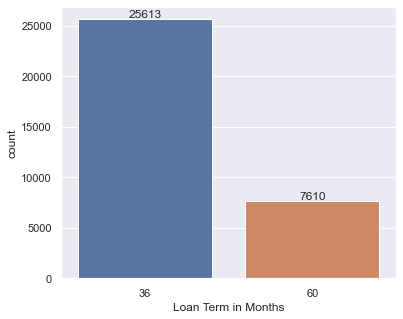

In [329]:
#count the number of loans applied for 36 and 60 months
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=loan_data.term)
ax.bar_label(ax.containers[0])
plt.xlabel('Loan Term in Months')
plt.show()

**Inference**: Most of the loans were for 36 months term as compared to the 60 months loans.

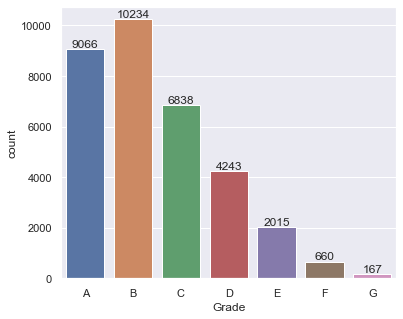

In [330]:
#count the number of grades assigned to the borrowers by understanding their distribution
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=loan_data.grade, order = sorted(loan_data['grade'].unique()))
ax.bar_label(ax.containers[0])
plt.xlabel('Grade')
plt.show()

**Inference**: Plot shows most of the loans are grade A and B type. Therefore we can say, most of the loans are high graded loans.

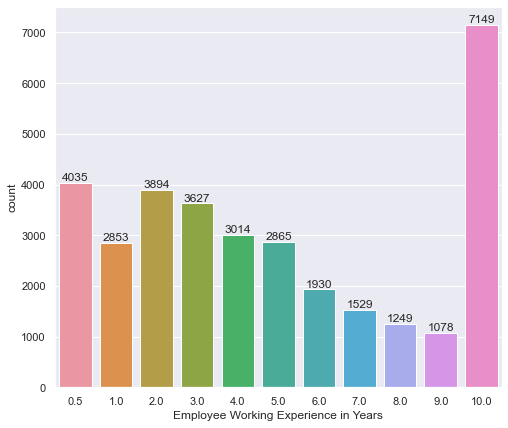

In [331]:
#count the number of years of experience of the borrowers
sns.set(rc={'figure.figsize':(8,7)})
ax = sns.countplot(x=loan_data.emp_length)
ax.bar_label(ax.containers[0])
plt.xlabel('Employee Working Experience in Years')
plt.show()

**Inference**: Majority of employees applying for the loans are having more than 10 years of experience.

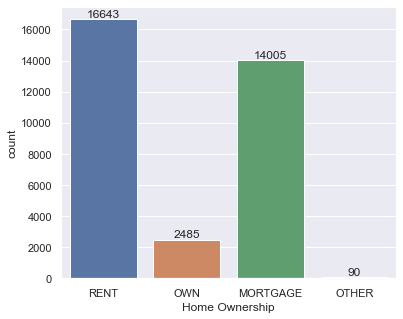

In [332]:
#checking the home owenership of the borrowers
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=loan_data.home_ownership)
ax.bar_label(ax.containers[0])
plt.xlabel('Home Ownership')
plt.show()

**Inference**: Most of the borrowers are renting the house followed by morgage while other is the least.

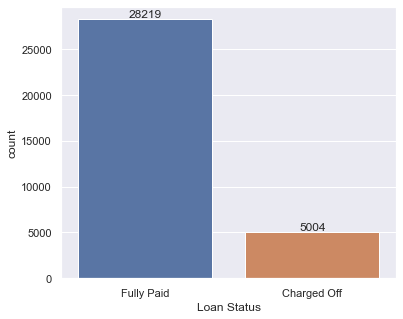

In [333]:
#checking how many loans are fully paid and charged off
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=loan_data.loan_status)
ax.bar_label(ax.containers[0])
plt.xlabel('Loan Status')
plt.show()

**Inference**: Maximum number loans are fully paid.

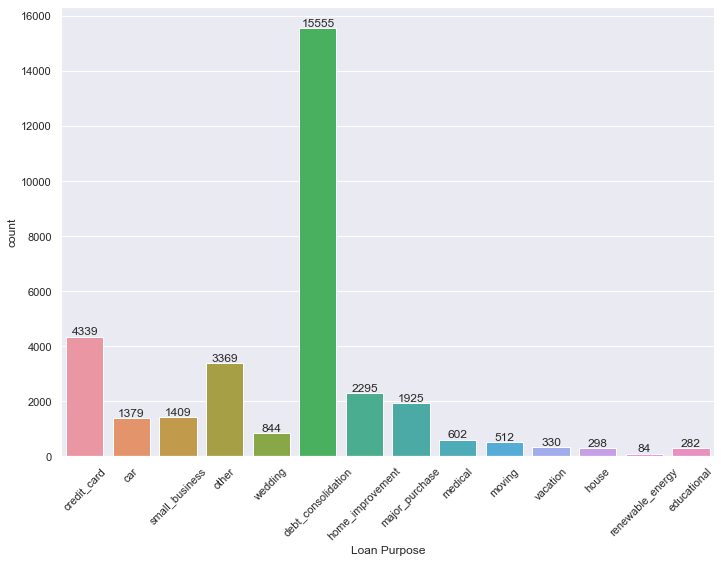

In [334]:
#understanding the purpose of loan applied by the borrowers
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=loan_data.purpose)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Loan Purpose')
plt.show()

**Inference**: Maximum number of loans are applied for the debt consolidation followed by credit card while renewable energy is the least.

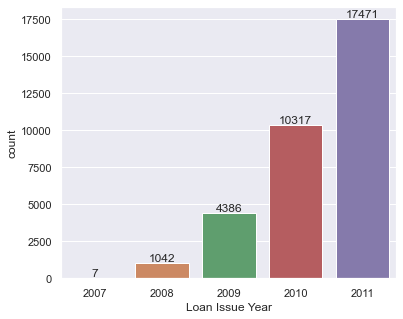

In [335]:
#to get the year in which maximum number of loans were applied
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=loan_data.issue_d_year)
ax.bar_label(ax.containers[0])
plt.xlabel('Loan Issue Year')
plt.show()

**Inference**: Maximum number of loans were applied in 2011 followed by 2010

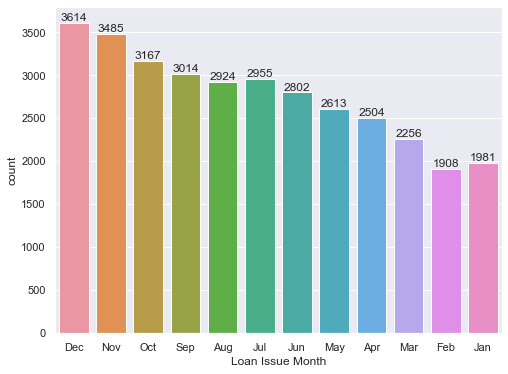

In [336]:
#to get the month in which maximum number of loans were applied
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x=loan_data.issue_d_month)
ax.bar_label(ax.containers[0])
plt.xlabel('Loan Issue Month')
plt.show()

**Inference**: Maximum number of loans were applied in December. We can say the number of loan are getting increased as per the months past in the year.

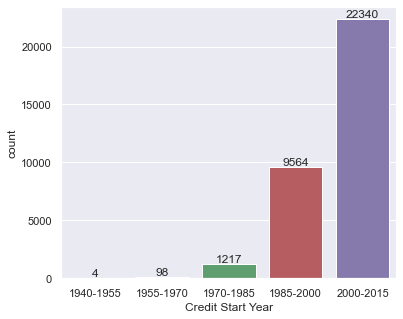

In [337]:
#get the years when credits were started 
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=pd.cut(loan_data['earliest_cr_line_year'],bins = 5,precision =0,labels=['1940-1955','1955-1970','1970-1985','1985-2000','2000-2015']))
ax.bar_label(ax.containers[0])
plt.xlabel('Credit Start Year')
plt.show()

**Inference**: Maximum credit scores started between 2000-2015 followed by 1985-2000.

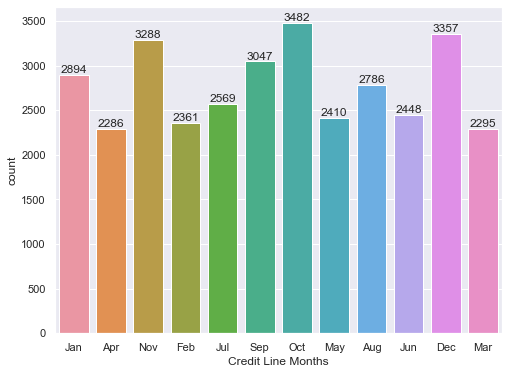

In [338]:
#get the months when credits were recorded
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x=loan_data.earliest_cr_line_month)
ax.bar_label(ax.containers[0])
plt.xlabel('Credit Line Months')
plt.show()

**Inference**: Maximum credits are getting recorded from the last quarter of the year i.e. October, November and December.

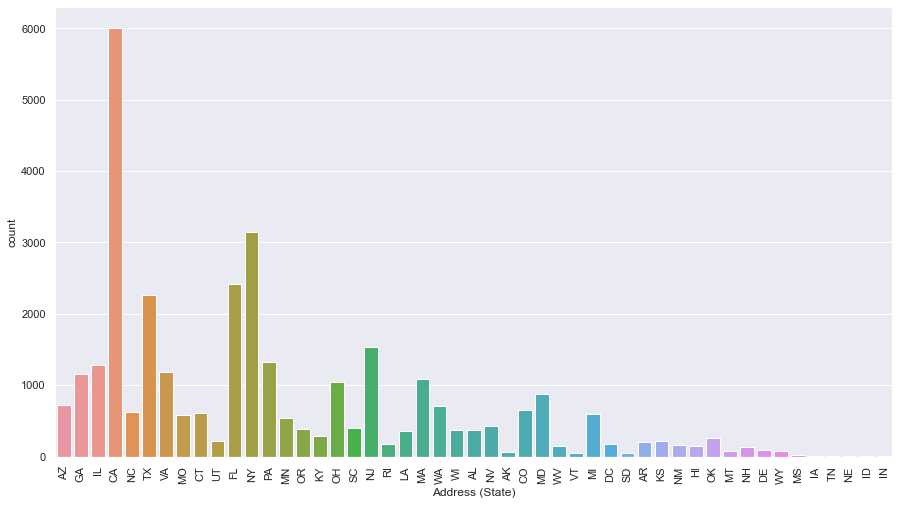

In [339]:
#to get which state applied for maximum loans
sns.set(rc={'figure.figsize':(15,8.27)})
sns.countplot(x=loan_data.addr_state)
plt.xlabel('Address (State)')
plt.xticks(rotation=90)
plt.show()

**Inference**: Maximum loans are applied from the state CS followed by NY.

## Observations

### The above univariate analysis concludes some good insights about the borrowers and past sanctioned loans. Below are the few outcomes of the analysis:

* More number of loans are applied near 5000 while the amount 10000 was applied the most.
* Most of the applicants have taken loan for 36 months than 60 months.
* Most of the loans are from grade A, B, and C.
* Majority of employees applying for the loans are having more than 10 years of experience.
* Most of the borrowers are renting the house instead of their own house or others.
* Around 85% of loans are fully paid and 15% are considered as charged off.
* Maximum loans are applied for debt consolidation.
* Number of loans are getting increased exponentially every year. 2011 witnessed for maximum number of loans.
* Loans are getting increased on every month. Maximum number of loans are applied in December.
* Credit has been mushroomed in the recent years. Mid and late nineties are having very less credit.
* Most of the loans are getting applied in last quarter of the year.
* By considering the states, maximum loans are applied from CS state.

## Bivariate Analysis

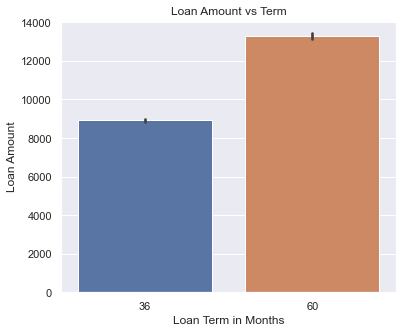

In [340]:
#distribution of loan amount with respect to terms in months
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(y='loan_amnt', x='term', data=loan_data)
plt.title('Loan Amount vs Term')
plt.xlabel('Loan Term in Months')
plt.ylabel('Loan Amount')
plt.show()

**Inference**: Higher amount loans are having long term which is 60 months.

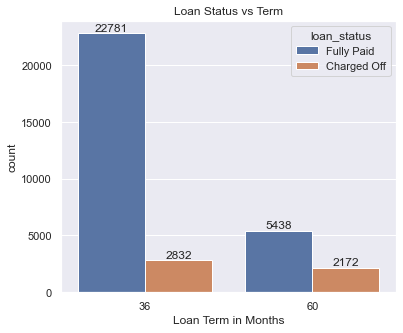

In [341]:
#checking the loan status with respect to terms
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=loan_data.term, hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Loan Term in Months')
plt.title('Loan Status vs Term')
plt.show()

**Inference**: Most of the loans are for 36 months term also but long term loan for 60 months has more charged off. (Long term loan have chances of more default)

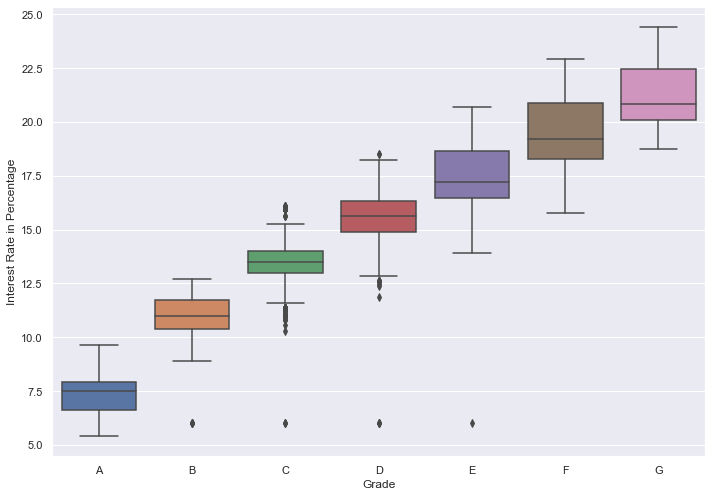

In [342]:
#distribution of interest with respect to grade
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y=loan_data.int_rate, x=loan_data.grade, order = sorted(loan_data['grade'].unique()))
plt.ylabel('Interest Rate in Percentage')
plt.xlabel('Grade')
plt.show()

**Inference**: Higher grade which is A, B, C are having less loan interest rate while lower grades which is D, E, F are having more interest rate.

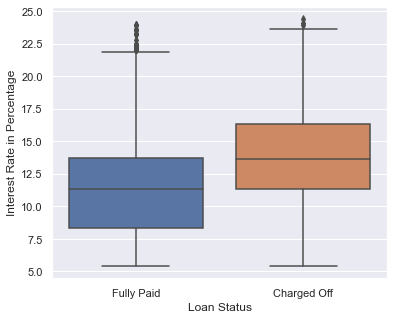

In [343]:
#impact of interest rate on loan status
sns.set(rc={'figure.figsize':(6,5)})
sns.boxplot(y=loan_data.int_rate, x=loan_data.loan_status)
plt.ylabel('Interest Rate in Percentage')
plt.xlabel('Loan Status')
plt.show()

**Inference**: High interest rate is having more number of charged off as compared to the lower interest rate.

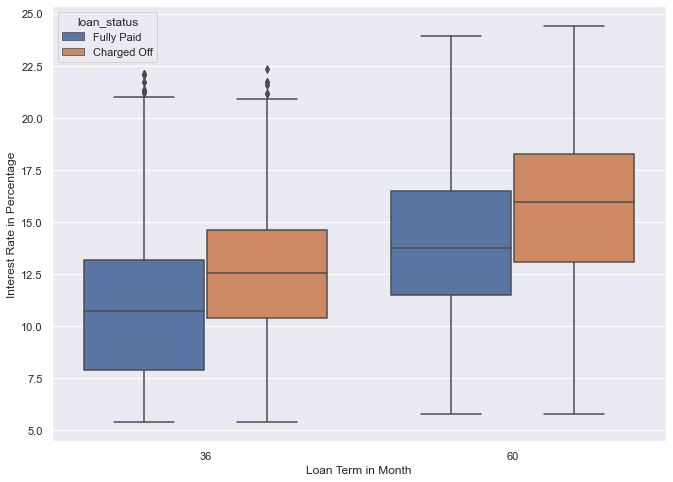

In [344]:
#effect of interest rate on loan status with respect to term in months
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(y=loan_data.int_rate, x=loan_data.term, hue=loan_data.loan_status)
plt.ylabel('Interest Rate in Percentage')
plt.xlabel('Loan Term in Month')
plt.show()

**Inference**: In both the terms, the chances of charged off are high if the interest rate is more.

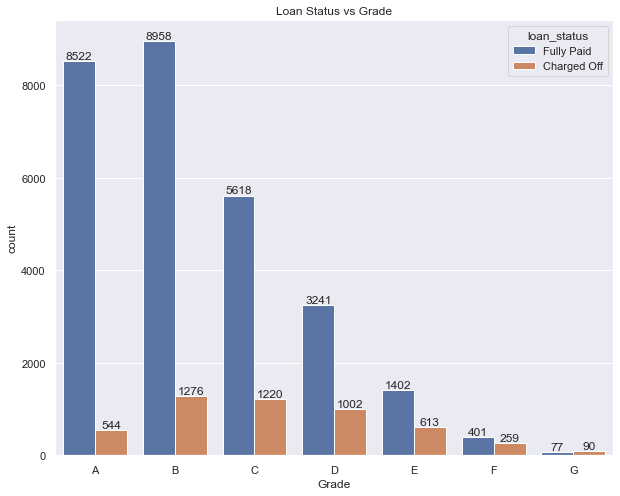

In [345]:
#impact of grades on loan status
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=loan_data.grade, hue='loan_status', data=loan_data, order = sorted(loan_data['grade'].unique()))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Grade')
plt.xlabel('Grade')
plt.show()

**Inference**: Plot shows that lower grades are more tend to be defaulters.

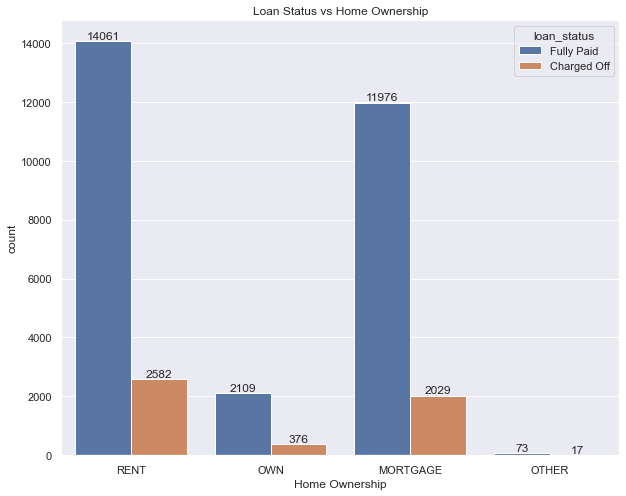

In [346]:
#impact of home ownership on loan status
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=loan_data.home_ownership, hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Home Ownership')
plt.xlabel('Home Ownership')
plt.show()

**Inference**: The ratio of defaulters is maximum for Other category followed by Rent.

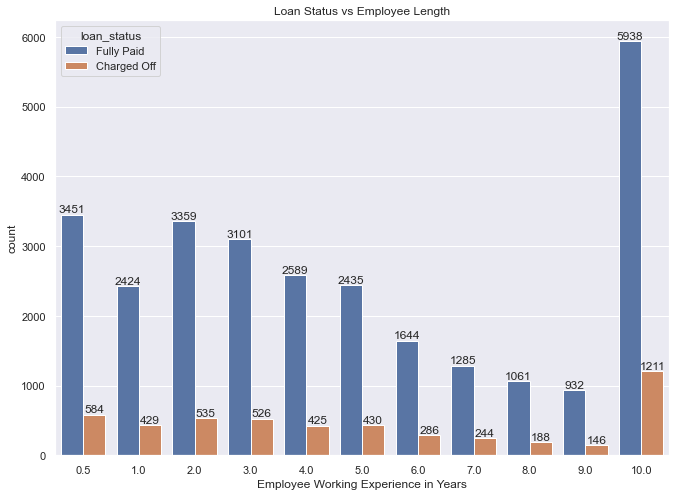

In [347]:
#impact of working experience on loan status
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.countplot(x=loan_data.emp_length, hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Employee Length')
plt.xlabel('Employee Working Experience in Years')
plt.show()

**Inference**: The ratio of defaulters is maximum for borrowers who has experience of more than 10 years followed by 7 years.

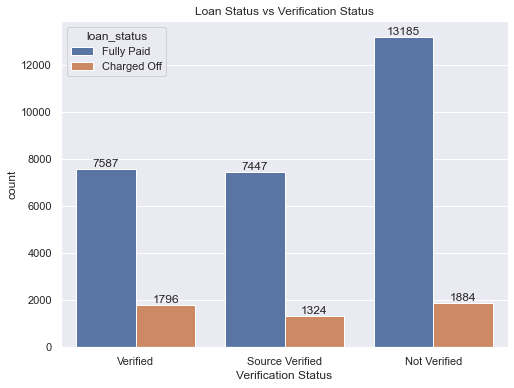

In [348]:
#impact of verification status on loan status
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x=loan_data.verification_status, hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Verification Status')
plt.xlabel('Verification Status')
plt.show()

**Inference**: The ratio of defaulters is maximum for borrowers are verified.

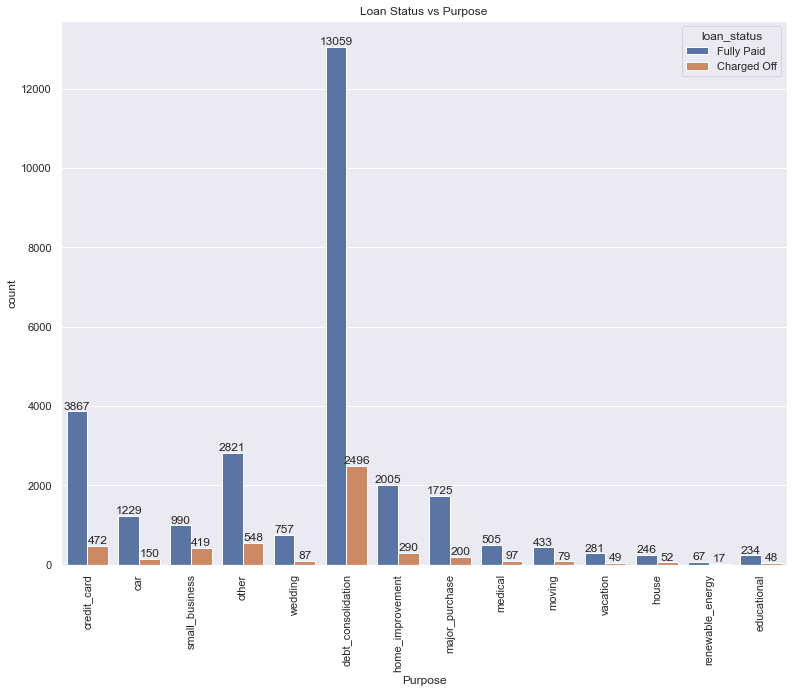

In [349]:
#impact of purpose of loan on loan status
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.countplot(x=loan_data.purpose, hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Purpose')
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.show()

**Inference**: The ratio of defaulters is maximum for small scale business borrowers followed by renewable energy.

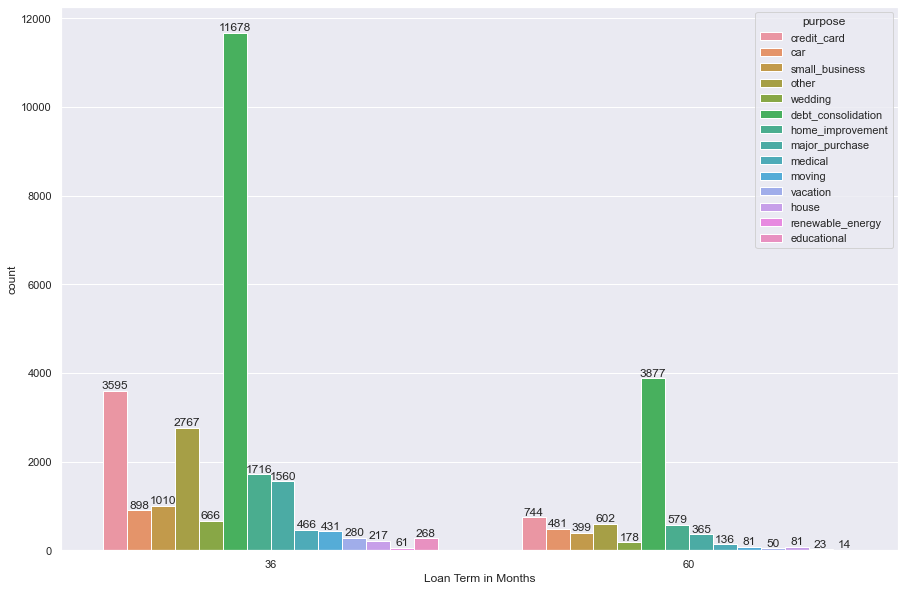

In [350]:
#distribution of loan purpose in both 36 & 60 month terms
plt.figure(figsize=(15,10))
ax = sns.countplot(x=loan_data.term, hue=loan_data.purpose)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Loan Term in Months')
plt.show()

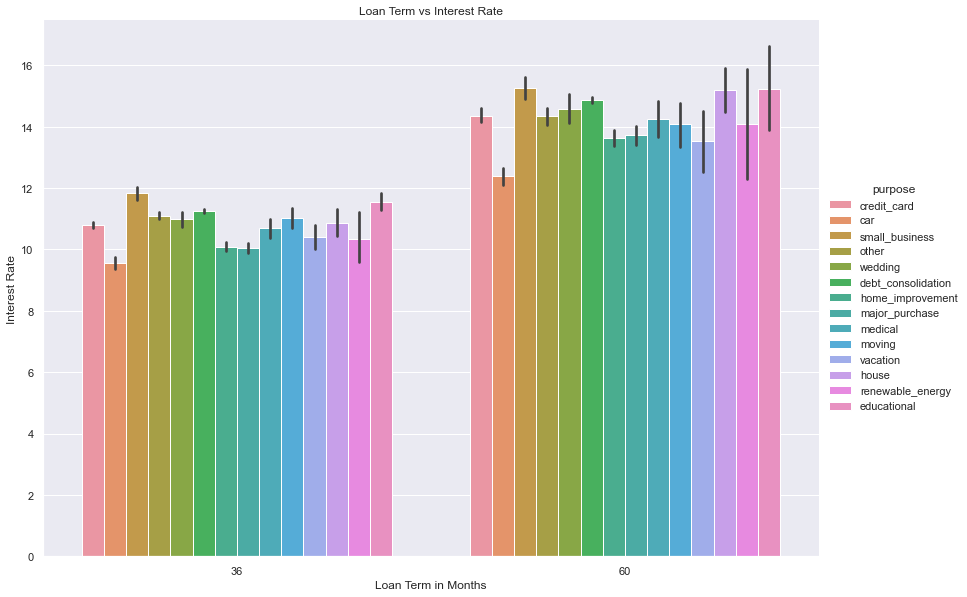

In [351]:
#distribution of loan purpose with respect to interest rate and terms
sns.catplot(data=loan_data, kind="bar", x="term", y="int_rate", hue="purpose", height=8.27, aspect=11.7/8.27)
plt.title('Loan Term vs Interest Rate')
plt.xlabel('Loan Term in Months')
plt.ylabel('Interest Rate')
plt.show()

**Inference**: Loan purposes of educational, house, other and the small business loans are having very high interest rate, debt consolidation with medium high interest rate.

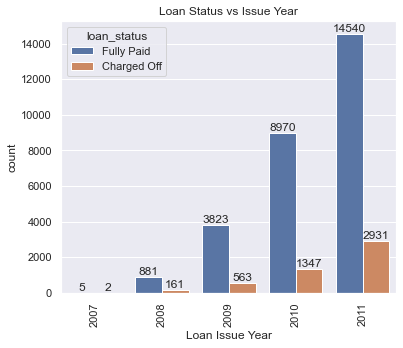

In [352]:
#impact of loan issue year on loan status
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x=loan_data.issue_d_year, hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Issue Year')
plt.xticks(rotation=90)
plt.xlabel('Loan Issue Year')
plt.show()

**Inference**: 2011 were having maximum defaulters as compared to other years.

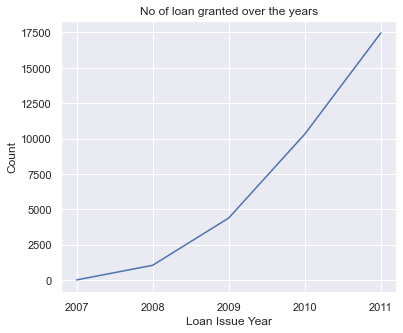

In [353]:
#loan distribution over the 5 years
g = loan_data.groupby('issue_d_year')['loan_status'].count()
g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.ylabel('Count')
plt.show()

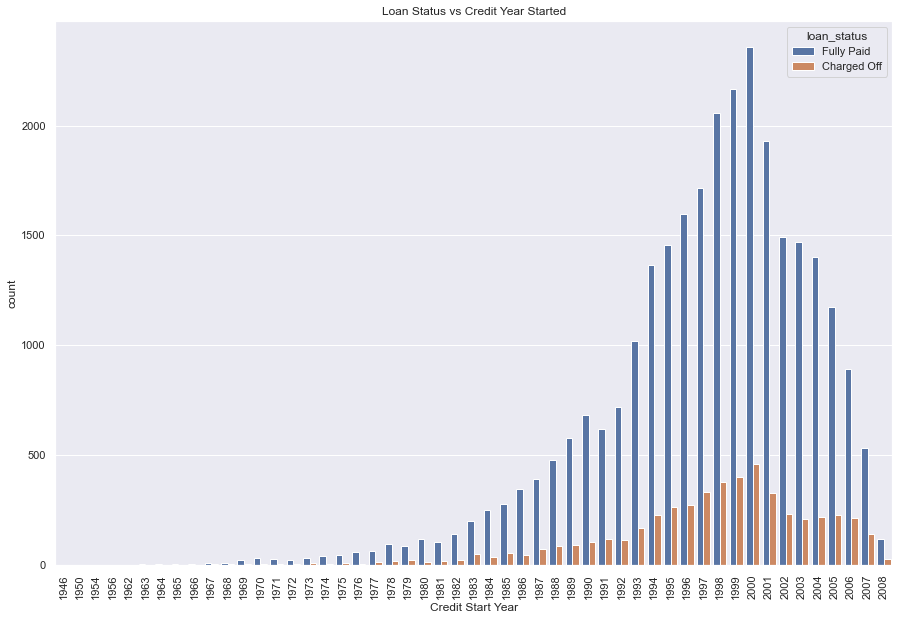

In [354]:
#impact of credit start year on loan status
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=loan_data.earliest_cr_line_year, hue='loan_status', data=loan_data)
plt.title('Loan Status vs Credit Year Started')
plt.xticks(rotation=90)
plt.xlabel('Credit Start Year')
plt.show()

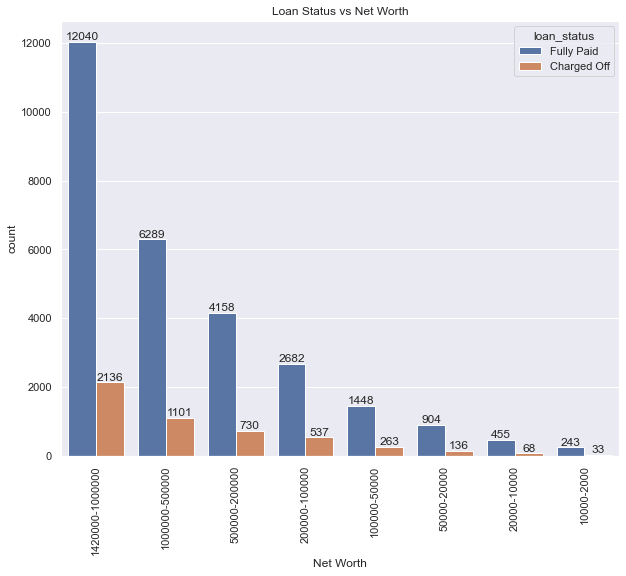

In [355]:
#impact of net worth of the borrower on loan status
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=pd.cut(loan_data['net_worth'],bins = 8,precision =0,labels=['1420000-1000000','1000000-500000','500000-200000','200000-100000','100000-50000', '50000-20000', '20000-10000', '10000-2000']), hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Net Worth')
plt.xticks(rotation=90)
plt.xlabel('Net Worth')
plt.show()

**Inference**: Borrowers whose net worth is between 100000-200000 tend to more defaulters followed by highest net worth borrowers.

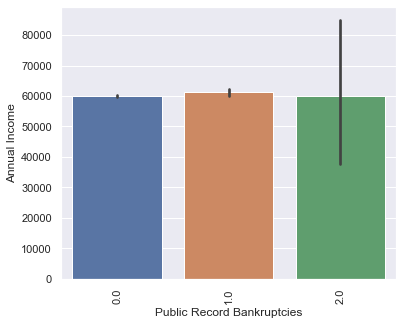

In [356]:
#impact of annual income on public record bankruptcies
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan_data)
plt.xticks(rotation=90)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Annual Income')
plt.show()

**Inference**: All the bankruptcies records looks similar so can't conclude anything from it.

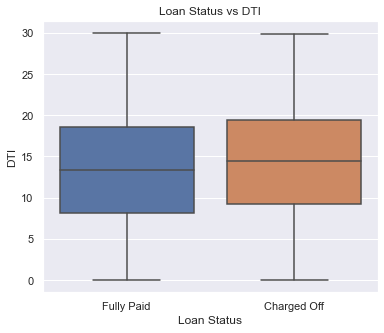

In [357]:
#impact of DTI on loan status
sns.set(rc={'figure.figsize':(6,5)})
sns.boxplot(x='loan_status', y=loan_data.dti, data=loan_data)
plt.title('Loan Status vs DTI')
plt.xlabel('Loan Status')
plt.ylabel('DTI')
plt.show()

**Inference**: Higher DTI values tends to be more defaulters as compared to less DTI.

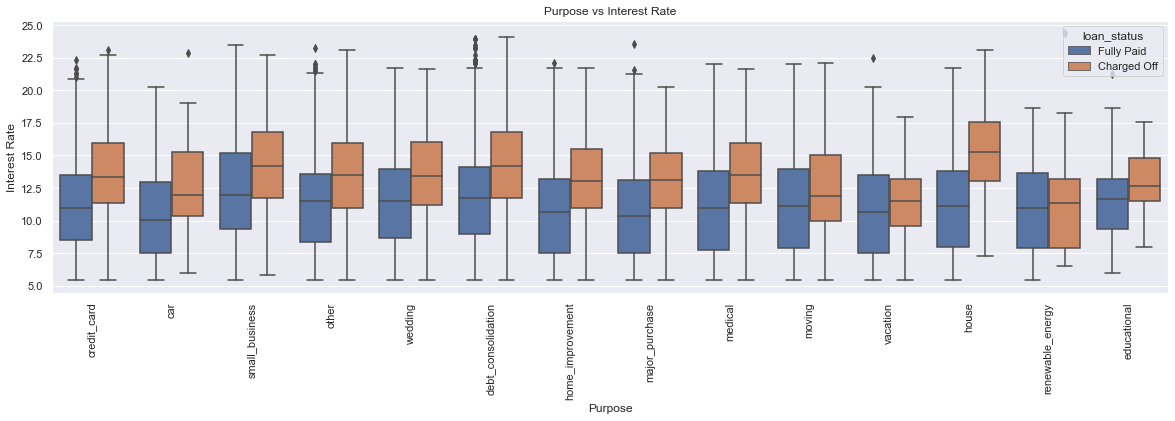

In [358]:
#affect of interest rate on loan status with respect to loan purpose
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.int_rate, hue='loan_status', data=loan_data)
plt.xticks(rotation=90)
plt.title('Purpose vs Interest Rate')
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.show()

**Inference**: Normally small businesses, renewable energy are having more defaulters. But if we consider the high interest rate factor then other purposes like house, debt consolidation are also tend to be charged off.

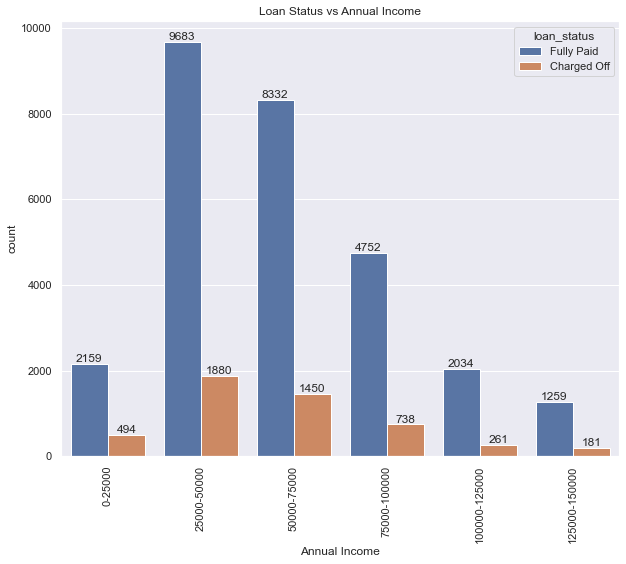

In [359]:
#impact of annual income on loan status
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=pd.cut(loan_data['annual_inc'],bins = 6,precision =0,labels=['0-25000','25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000']), hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Annual Income')
plt.xticks(rotation=90)
plt.xlabel('Annual Income')
plt.show()

**Inference**: The ratio of the borrowers with less income tends more to be defaulters.

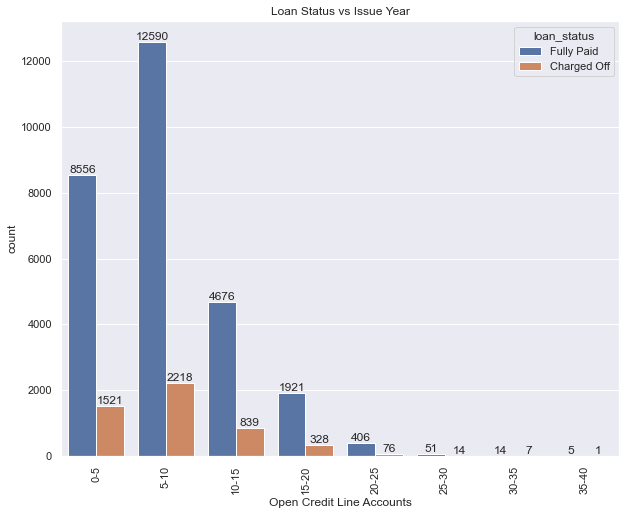

In [360]:
#impact of open credit lines on loan status
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=pd.cut(loan_data['open_acc'],bins = 8,precision =0,labels=['0-5','5-10','10-15','15-20','20-25', '25-30', '30-35', '35-40']), hue='loan_status', data=loan_data)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Status vs Issue Year')
plt.xticks(rotation=90)
plt.xlabel('Open Credit Line Accounts')
plt.show()

**Inference**: Borrowers having more credit line open accounts tends to be charged off more.

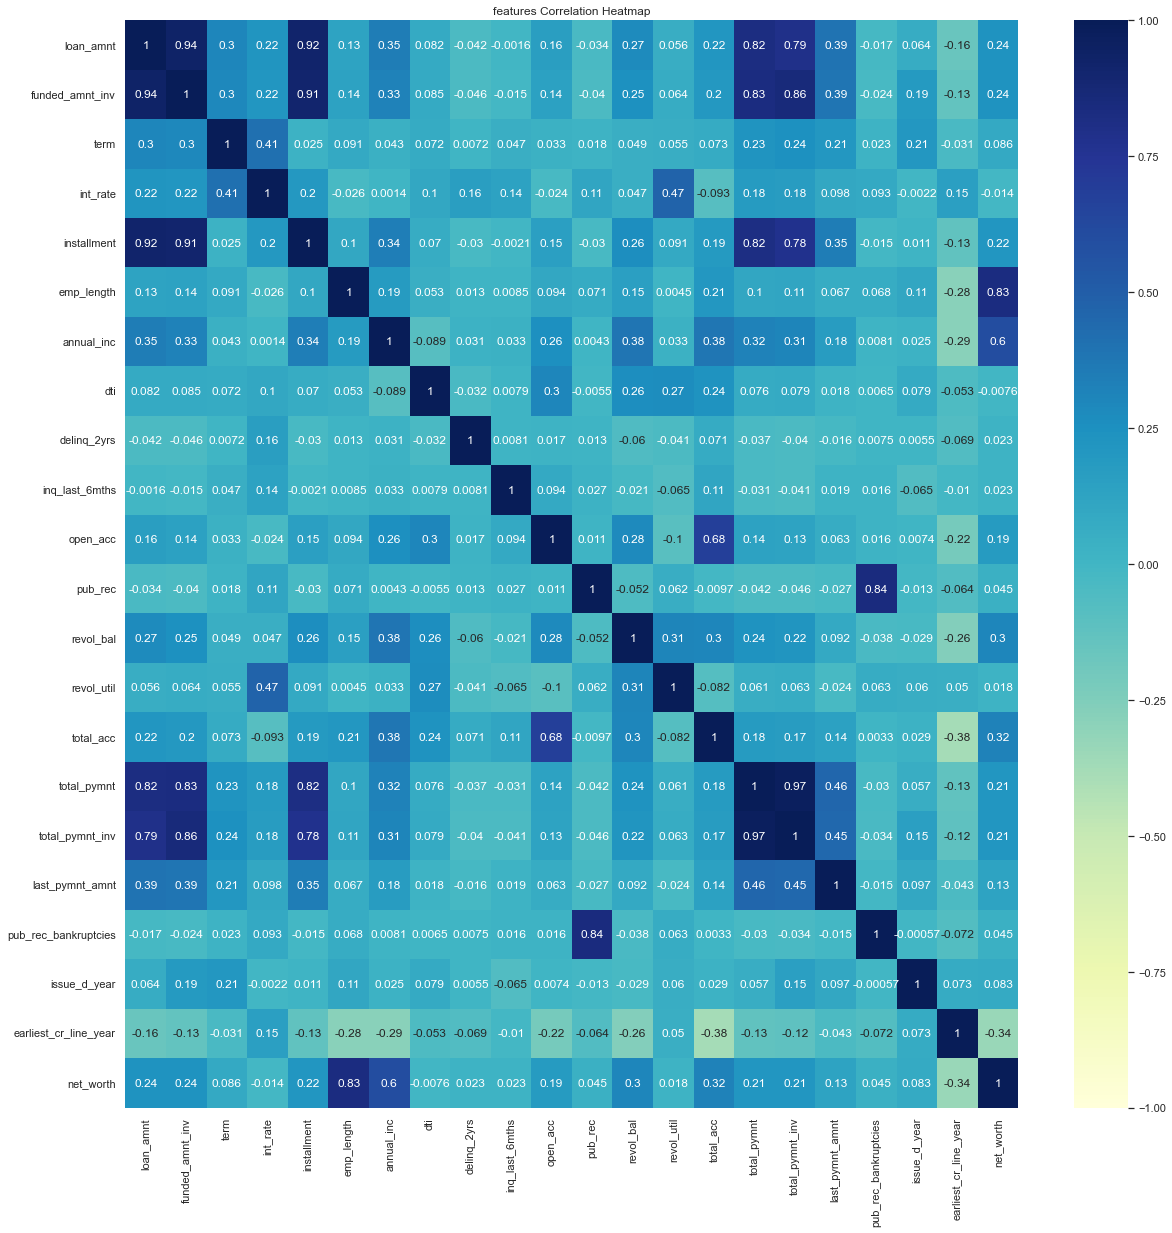

In [361]:
# plotting heat map to see correlation between features
relation = ["loan_amnt","funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "installment","emp_length","dti"]
loan_data_corr = loan_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(loan_data_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("features Correlation Heatmap")
plt.show()

**Inference**:
* Employee working length is highly correlated with net worth.
* Public derogatory records are highly correlated with public bankruptcies records.
* Installments are highly correlated with loan amount.
* Total payment to investors is highly correlated with funded amount y investors.

In [362]:
numeric_data = loan_data.select_dtypes(include = [np.number])
categorical_data = loan_data.select_dtypes(exclude = [np.number, np])
string_data = loan_data.select_dtypes(include = [np])

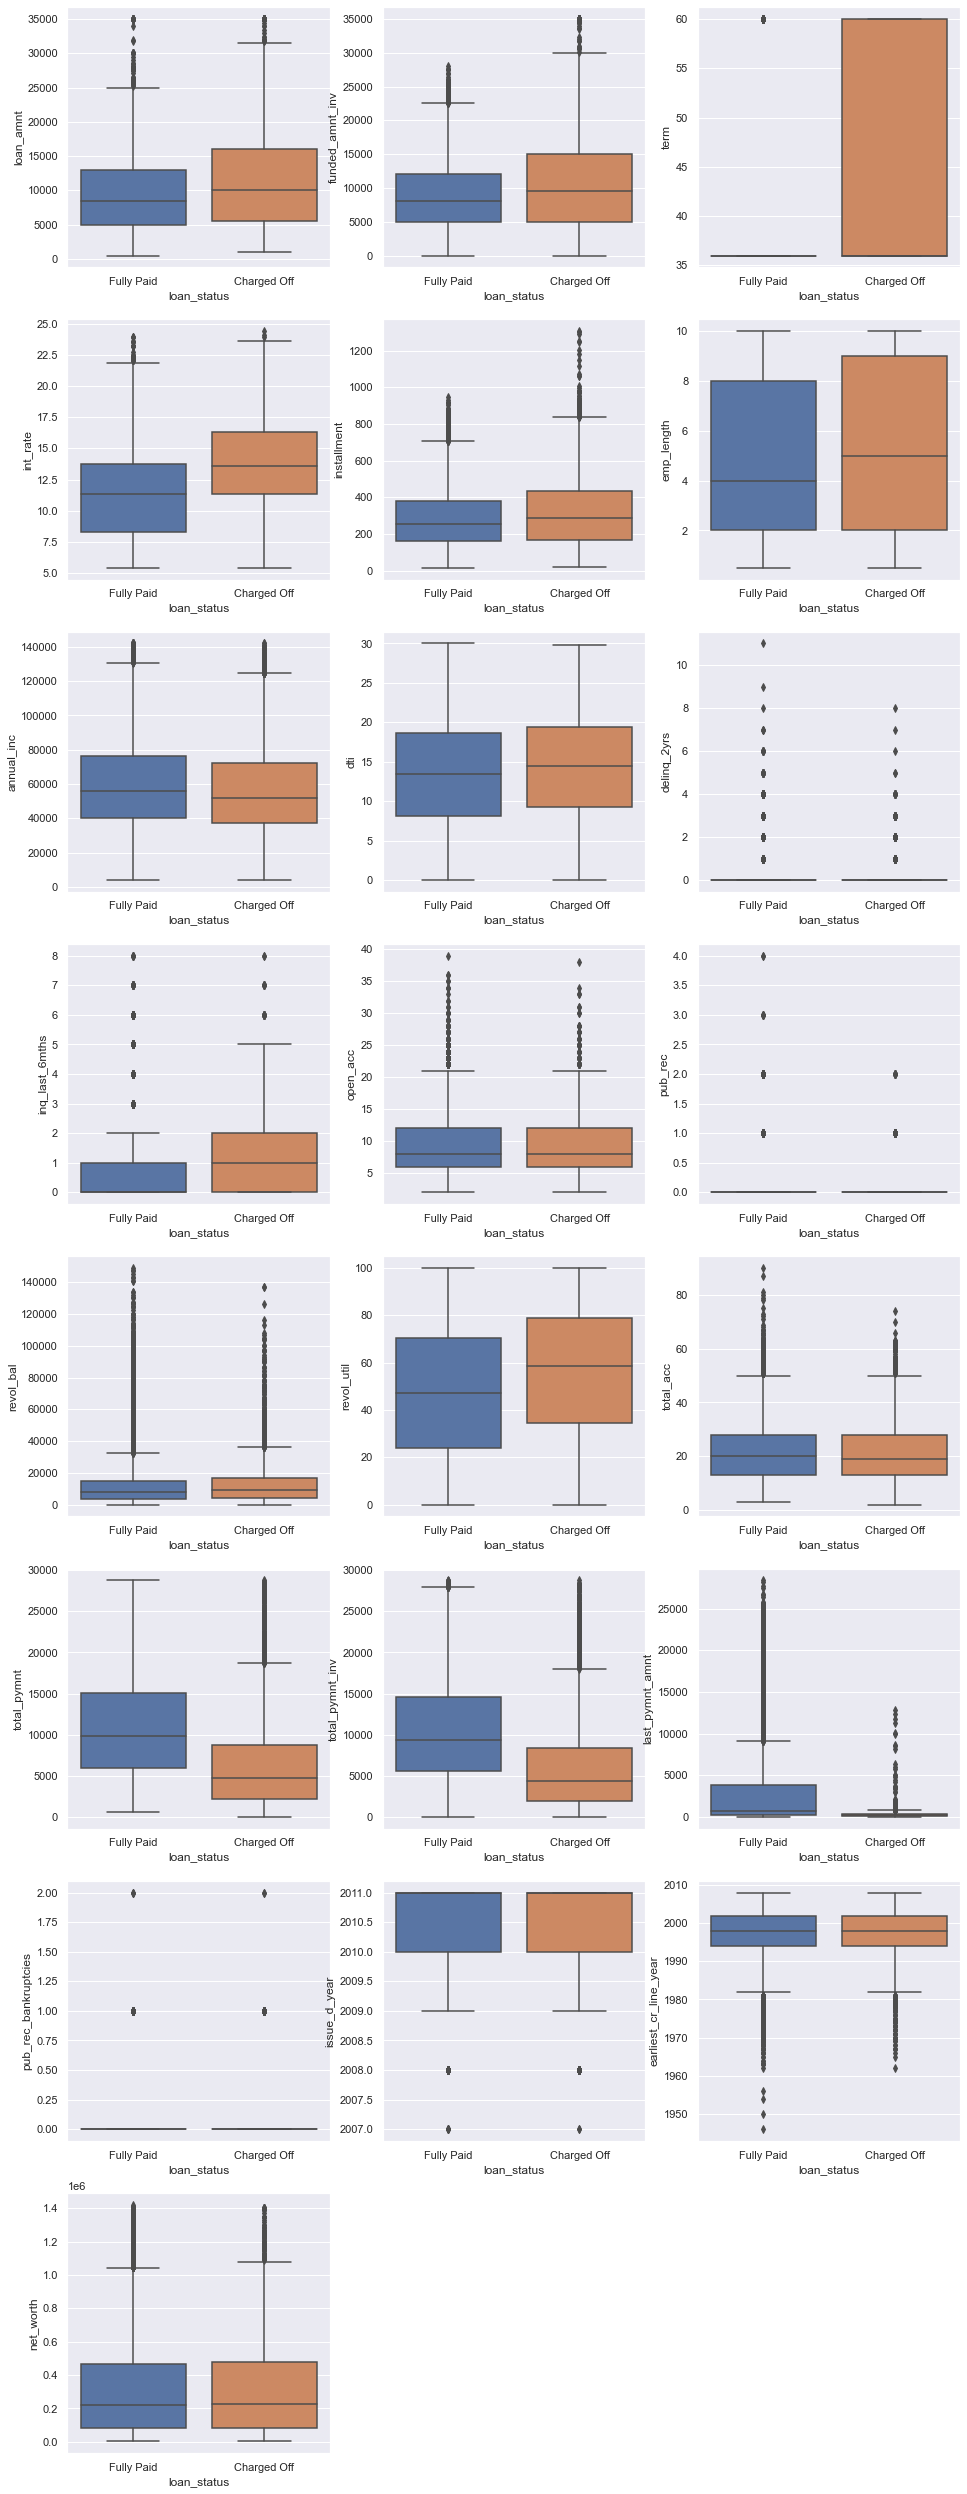

In [363]:
#summarising all the numeric attibutes in a single plot using subplot
plt.figure(figsize=(16,45))
for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=loan_data)
plt.show()

## Observations
### The above bivariate analysis provides good outcomes about the scenarios when their is high probability of getting the loans charged off and risks on getting it back. Below are the few outcomes of the analysis:

* Though more number of loans are applied for 36 months, the ratio of charged off loan is more for 60 months.
* Interest rate is high for lower grades. So there is possibility of charged off for them.
* More number of loans are getting charged off is interest rate is high and it has been noticed for for the terms.
* Lower grade loans are getting charged off more.
* By considering the ratio, borrowers who comes under 'Other' in home ownership are having more charged off. But if we just consider the numbers then the borrowers who rent the home are having more charged off.
* Applicants with employement length of 10+ years are more charged off.
* The ratio of defaulters is maximum for borrowers who are 'Verified'; however, the numbers are high for those who are 'Not Verified'.
* The ratio of defaulters is maximum for small scale business borrowers; however, the numbers are high for debt consolidation.
* Borrowers whose net worth is between 100000-200000 tend to more defaulters.
* Higher DTI values tends to be more defaulters.
* Normally small businesses, renewable energy are having more defaulters. But if we consider the high interest rate factor then other purposes like house, debt consolidation are also tend to be charged off.
* Borrowers with less income tends more to be defaulters.
* Borrowers having more credit line open accounts tends to be charged off more.